In [90]:
pip install nfl_data_py

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [91]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\ginob\appdata\local\programs\python\python310\lib\site-packages (2.1.1)




[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [92]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [101]:
#Gino Benitez
import nfl_data_py as nfl
import pandas as panda
import os
import matplotlib.pyplot as plt
from matplotlib import style


SyntaxError: invalid syntax (94356383.py, line 1)

In [94]:
wbw = nfl.import_ngs_data('rushing')

In [95]:
y = 2022

In [96]:
wbw.columns

Index(['season', 'season_type', 'week', 'player_display_name',
       'player_position', 'team_abbr', 'efficiency',
       'percent_attempts_gte_eight_defenders', 'avg_time_to_los',
       'rush_attempts', 'rush_yards', 'expected_rush_yards',
       'rush_yards_over_expected', 'avg_rush_yards',
       'rush_yards_over_expected_per_att', 'rush_pct_over_expected',
       'rush_touchdowns', 'player_gsis_id', 'player_first_name',
       'player_last_name', 'player_jersey_number', 'player_short_name'],
      dtype='object')

In [97]:
wbw = wbw[wbw['week'] == 0]
wbw = wbw[wbw['season'] == y]
wbw = wbw.reset_index()

In [98]:
avg_rush_att = wbw['rush_attempts'].mean()
player = wbw['player_short_name']
team = wbw['team_abbr']
avg_rush_td = wbw['rush_touchdowns'].mean()
eff = wbw['efficiency'].mean()
eff

3.757729522414928

In [99]:
plt.rcParams["figure.figsize"] = [20,20]
plt.rcParams["figure.autolayout"] = True

Text(0.5, 1.0, 'RB Rushing Attempts vs RB Touchdowns 2022 - 2023 Season\n')

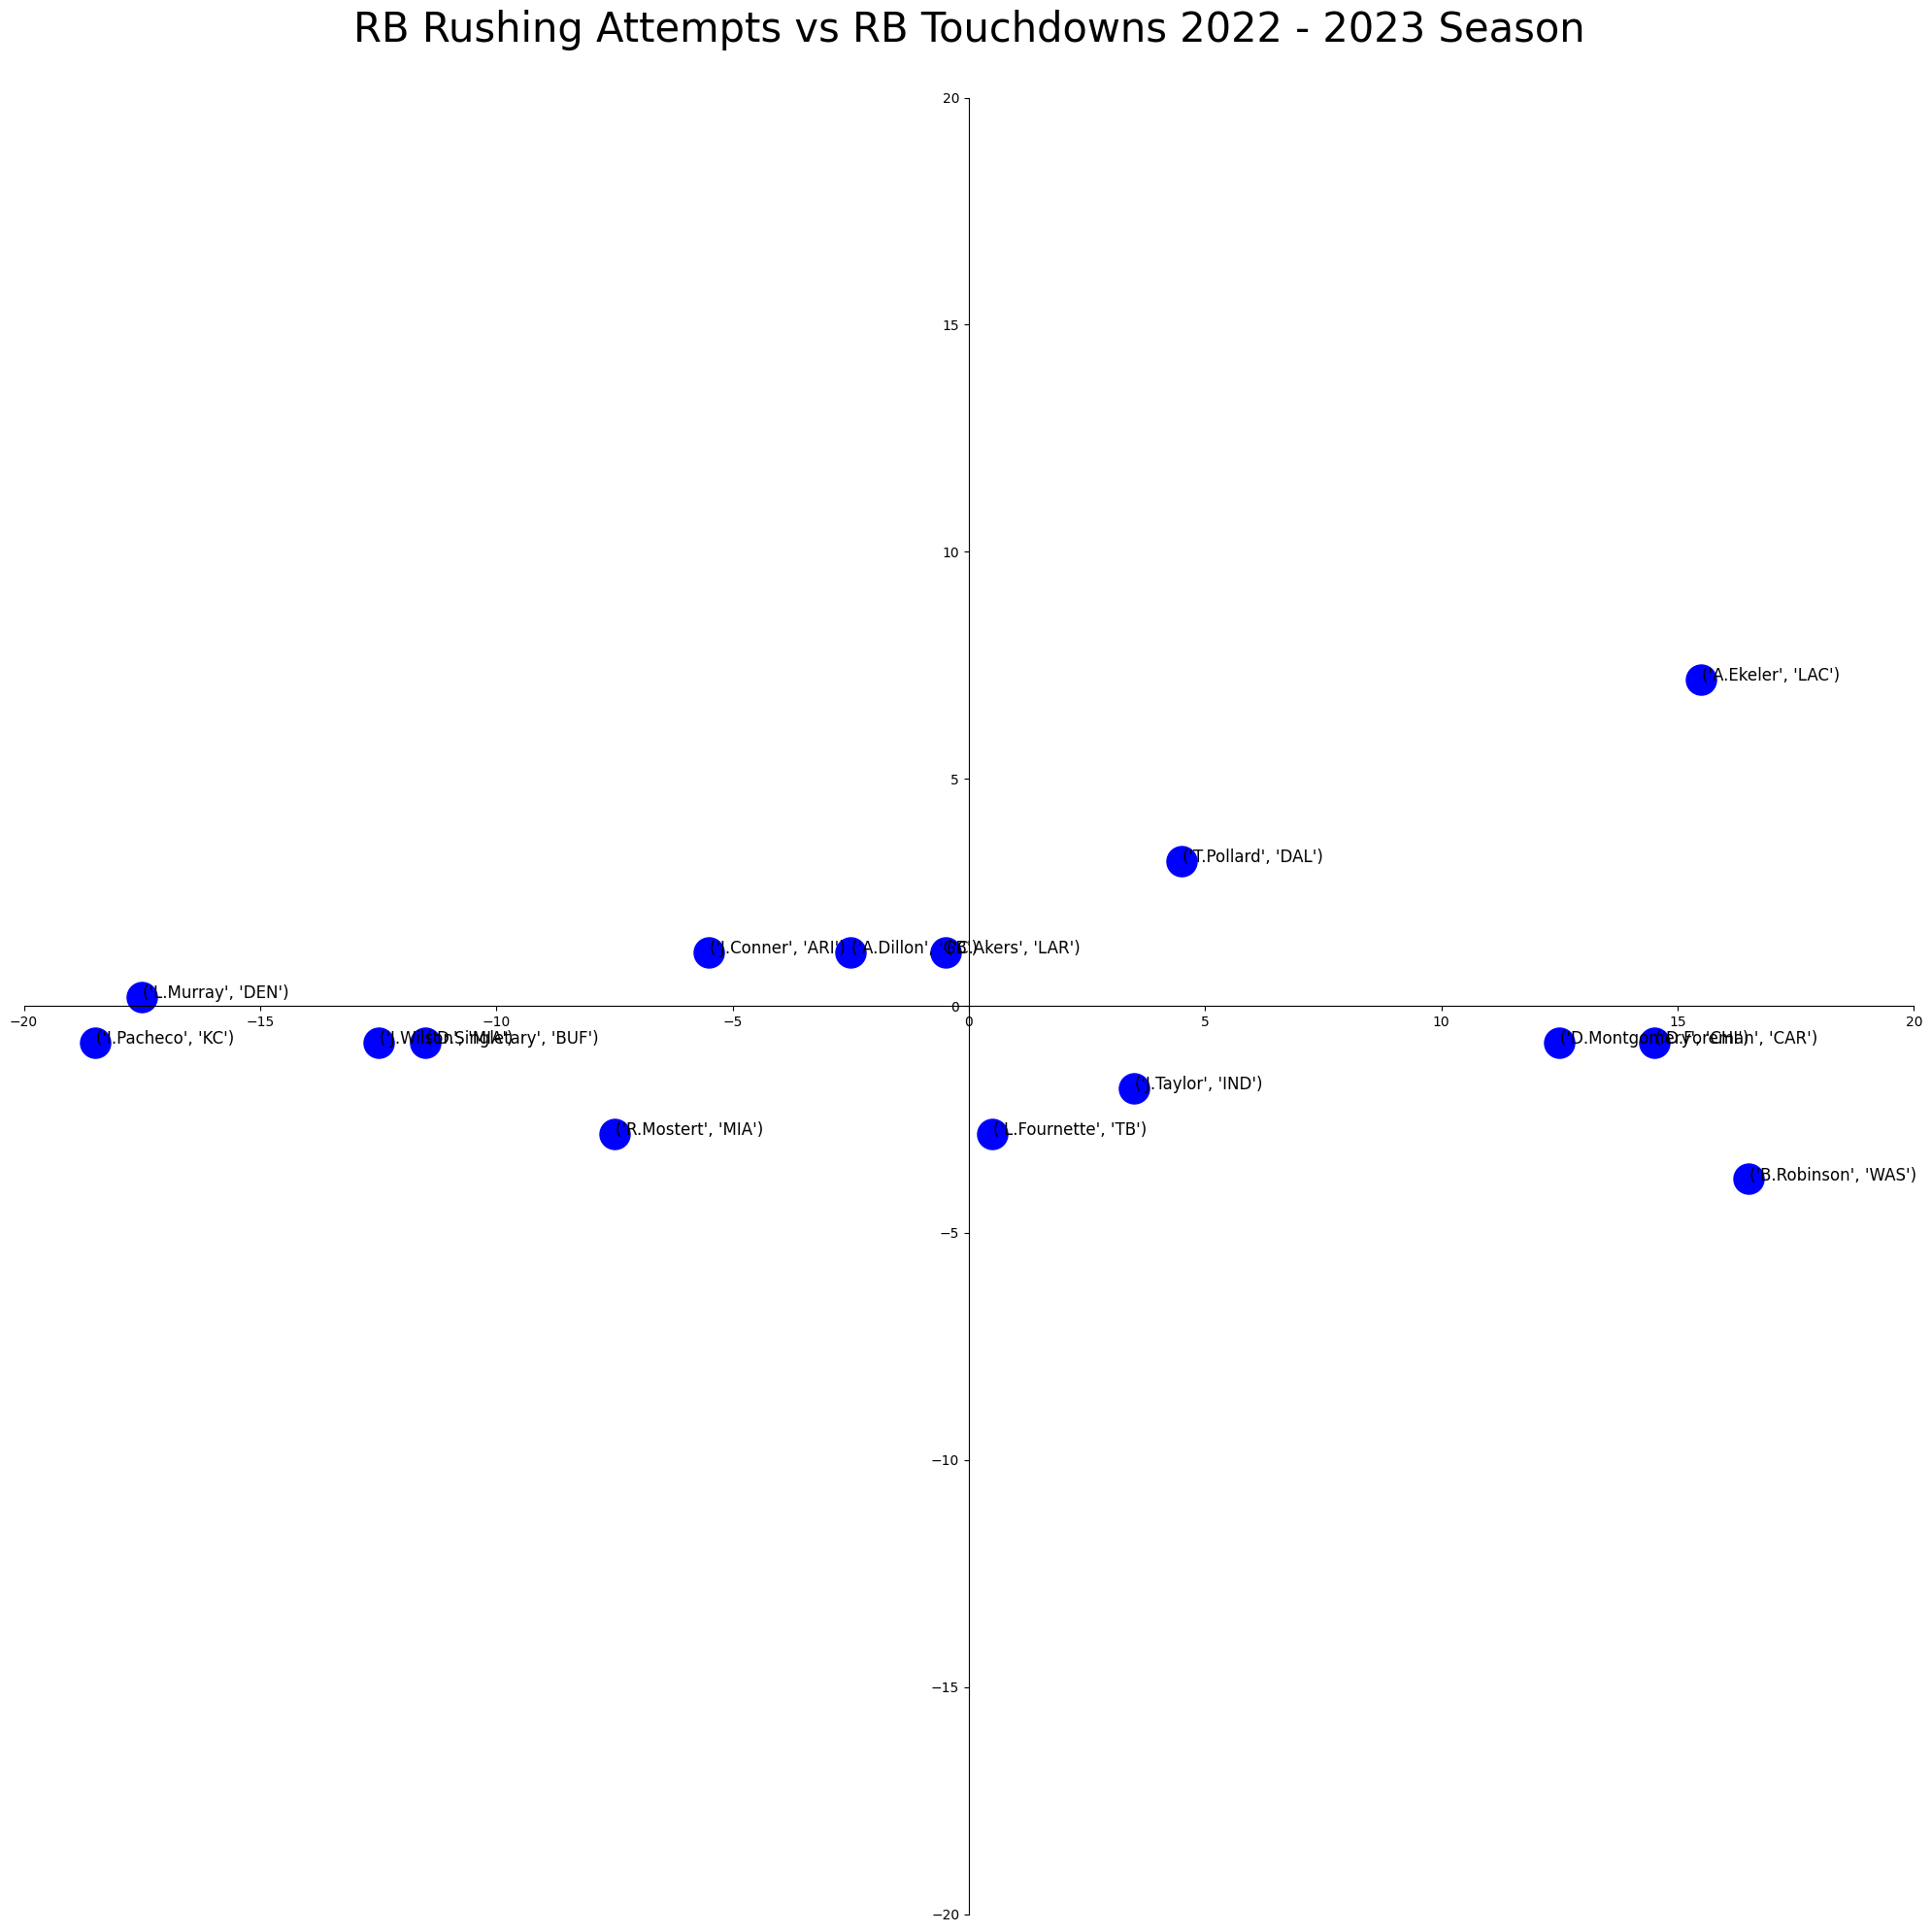

In [100]:
x= []
y= []

for rb in wbw.index:
    x.append(wbw['rush_attempts'][rb] - avg_rush_att)
    y.append(wbw['rush_touchdowns'][rb] - avg_rush_td)

xy = panda.DataFrame({'x':x, 'y':y})

fig, ax = plt.subplots()

ax.scatter(xy['x'], xy['y'], s =500, c = 'blue')

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.xlim((-20.0, 20.0))
plt.ylim((-20.0, 20.0))

for rb in xy.index:
    plt.annotate(f"{wbw['player_short_name'][rb], wbw['team_abbr'][rb]}", (xy['x'][rb]+ 0.025, xy['y'][rb]- 0.025),fontsize = 12)


plt.title(f'RB Rushing Attempts vs RB Touchdowns 2022 - 2023 Season\n', fontdict = {'fontsize': 30})
